- O objetivo desta trilha eh entender como os diferentes indicadores economicos,
educacionais e sociais se relacionam entre si, e entender como determinada tendencia
economica de determinada regiao influencia indicadores educacionais. Assim como na
trilha anterior, fica a cargo do candidato se ele deseja se ater a um contexto especıfico
(determinado municıpio, estado, etc.) ou a todo o paıs.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df_rj = pd.read_excel('planilha_rj.xlsx')

df_rj.drop(columns=['necessidades_humanas_basicas_nota_dimensao', 'fundamentos_bem_estar_nota_dimensao', 'oportunidades_nota_dimensao'], inplace=True)
#encurtando o nome de algumas colunas para ajudar na estética dos gráficos
df_rj.rename(columns={'nutricao_cuidados_medicos_basicos' : 'cuidados_medicos'} , inplace = True)


df_rj.sample(5)

,ano,regiao_administrativa,macro_regiao,ips_geral,cuidados_medicos,agua_saneamento,moradia,seguranca_pessoal,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
19,2018,Anchieta,norte,54.40,62.17,86.42,76.97,28.34,43.41,36.94,55.77,44.96,75.08,64.30,61.44,17.01
23,2020,Complexo Do Alemão,norte,43.68,51.47,92.98,39.64,44.62,31.00,12.85,64.32,39.59,44.41,39.29,63.52,0.52
55,2018,Vila Isabel,norte,73.73,77.65,94.21,87.49,67.17,60.52,74.99,68.35,57.74,68.66,64.11,90.72,73.20
71,2020,Guaratiba,oeste,43.54,64.71,17.54,59.45,77.99,53.26,22.15,14.52,34.36,77.06,50.47,45.24,5.68
53,2020,Vigário Geral,norte,54.93,54.17,88.64,71.39,73.91,46.77,36.45,55.32,44.55,56.26,48.21,70.56,12.94


In [4]:
df_rj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         99 non-null     int64  
 1   regiao_administrativa       99 non-null     object 
 2   macro_regiao                99 non-null     object 
 3   ips_geral                   99 non-null     float64
 4   cuidados_medicos            99 non-null     float64
 5   agua_saneamento             99 non-null     float64
 6   moradia                     99 non-null     float64
 7   seguranca_pessoal           99 non-null     float64
 8   acesso_conhecimento_basico  99 non-null     float64
 9   acesso_informacao           99 non-null     float64
 10  saude_bem_estar             99 non-null     float64
 11  qualidade_meio_ambiente     99 non-null     float64
 12  direitos_individuais        99 non-null     float64
 13  liberdades_individuais      99 non-nu

In [5]:
df_rj.describe()

,ano,ips_geral,cuidados_medicos,agua_saneamento,moradia,seguranca_pessoal,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2018.000000,58.593131,67.650404,84.268788,74.784040,61.886263,51.348081,45.680909,55.611818,44.956061,59.547879,56.910606,69.355758,31.214848
std,1.641304,11.627179,12.119778,15.439903,18.170536,20.703092,14.951137,22.697217,17.722614,15.651822,13.453785,17.804371,16.195646,27.167354
min,2016.000000,40.510000,30.760000,17.540000,18.420000,0.000000,0.000000,0.000000,14.520000,0.000000,18.800000,7.360000,33.340000,0.520000
25%,2016.000000,50.625000,62.175000,82.180000,68.720000,51.540000,42.735000,26.540000,41.150000,37.470000,50.840000,46.025000,59.150000,10.970000
50%,2018.000000,56.960000,67.590000,87.310000,76.970000,67.140000,53.840000,43.900000,54.720000,45.820000,59.000000,56.710000,69.470000,23.190000
75%,2020.000000,63.590000,74.280000,92.980000,86.545000,77.475000,60.930000,57.870000,69.385000,51.280000,69.995000,65.200000,79.910000,43.680000
max,2020.000000,87.120000,92.010000,99.320000,99.560000,96.420000,82.540000,89.060000,89.260000,95.740000,87.080000,96.770000,99.480000,99.390000


In [6]:
df_rj[df_rj['macro_regiao'] == 'rj']

,ano,regiao_administrativa,macro_regiao,ips_geral,cuidados_medicos,agua_saneamento,moradia,seguranca_pessoal,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
84,2016,Rio De Janeiro,rj,60.77,70.19,83.68,78.16,71.34,49.96,50.89,62.03,50.26,61.46,54.82,64.14,32.36
85,2018,Rio De Janeiro,rj,60.85,70.61,83.68,79.23,60.44,49.61,50.89,54.54,46.74,68.06,59.85,74.14,32.36
86,2020,Rio De Janeiro,rj,60.79,66.12,83.68,79.57,67.14,66.19,50.89,53.08,36.37,54.33,62.72,77.05,32.36


Text(0.5, 1.0, 'Matriz Correlação')

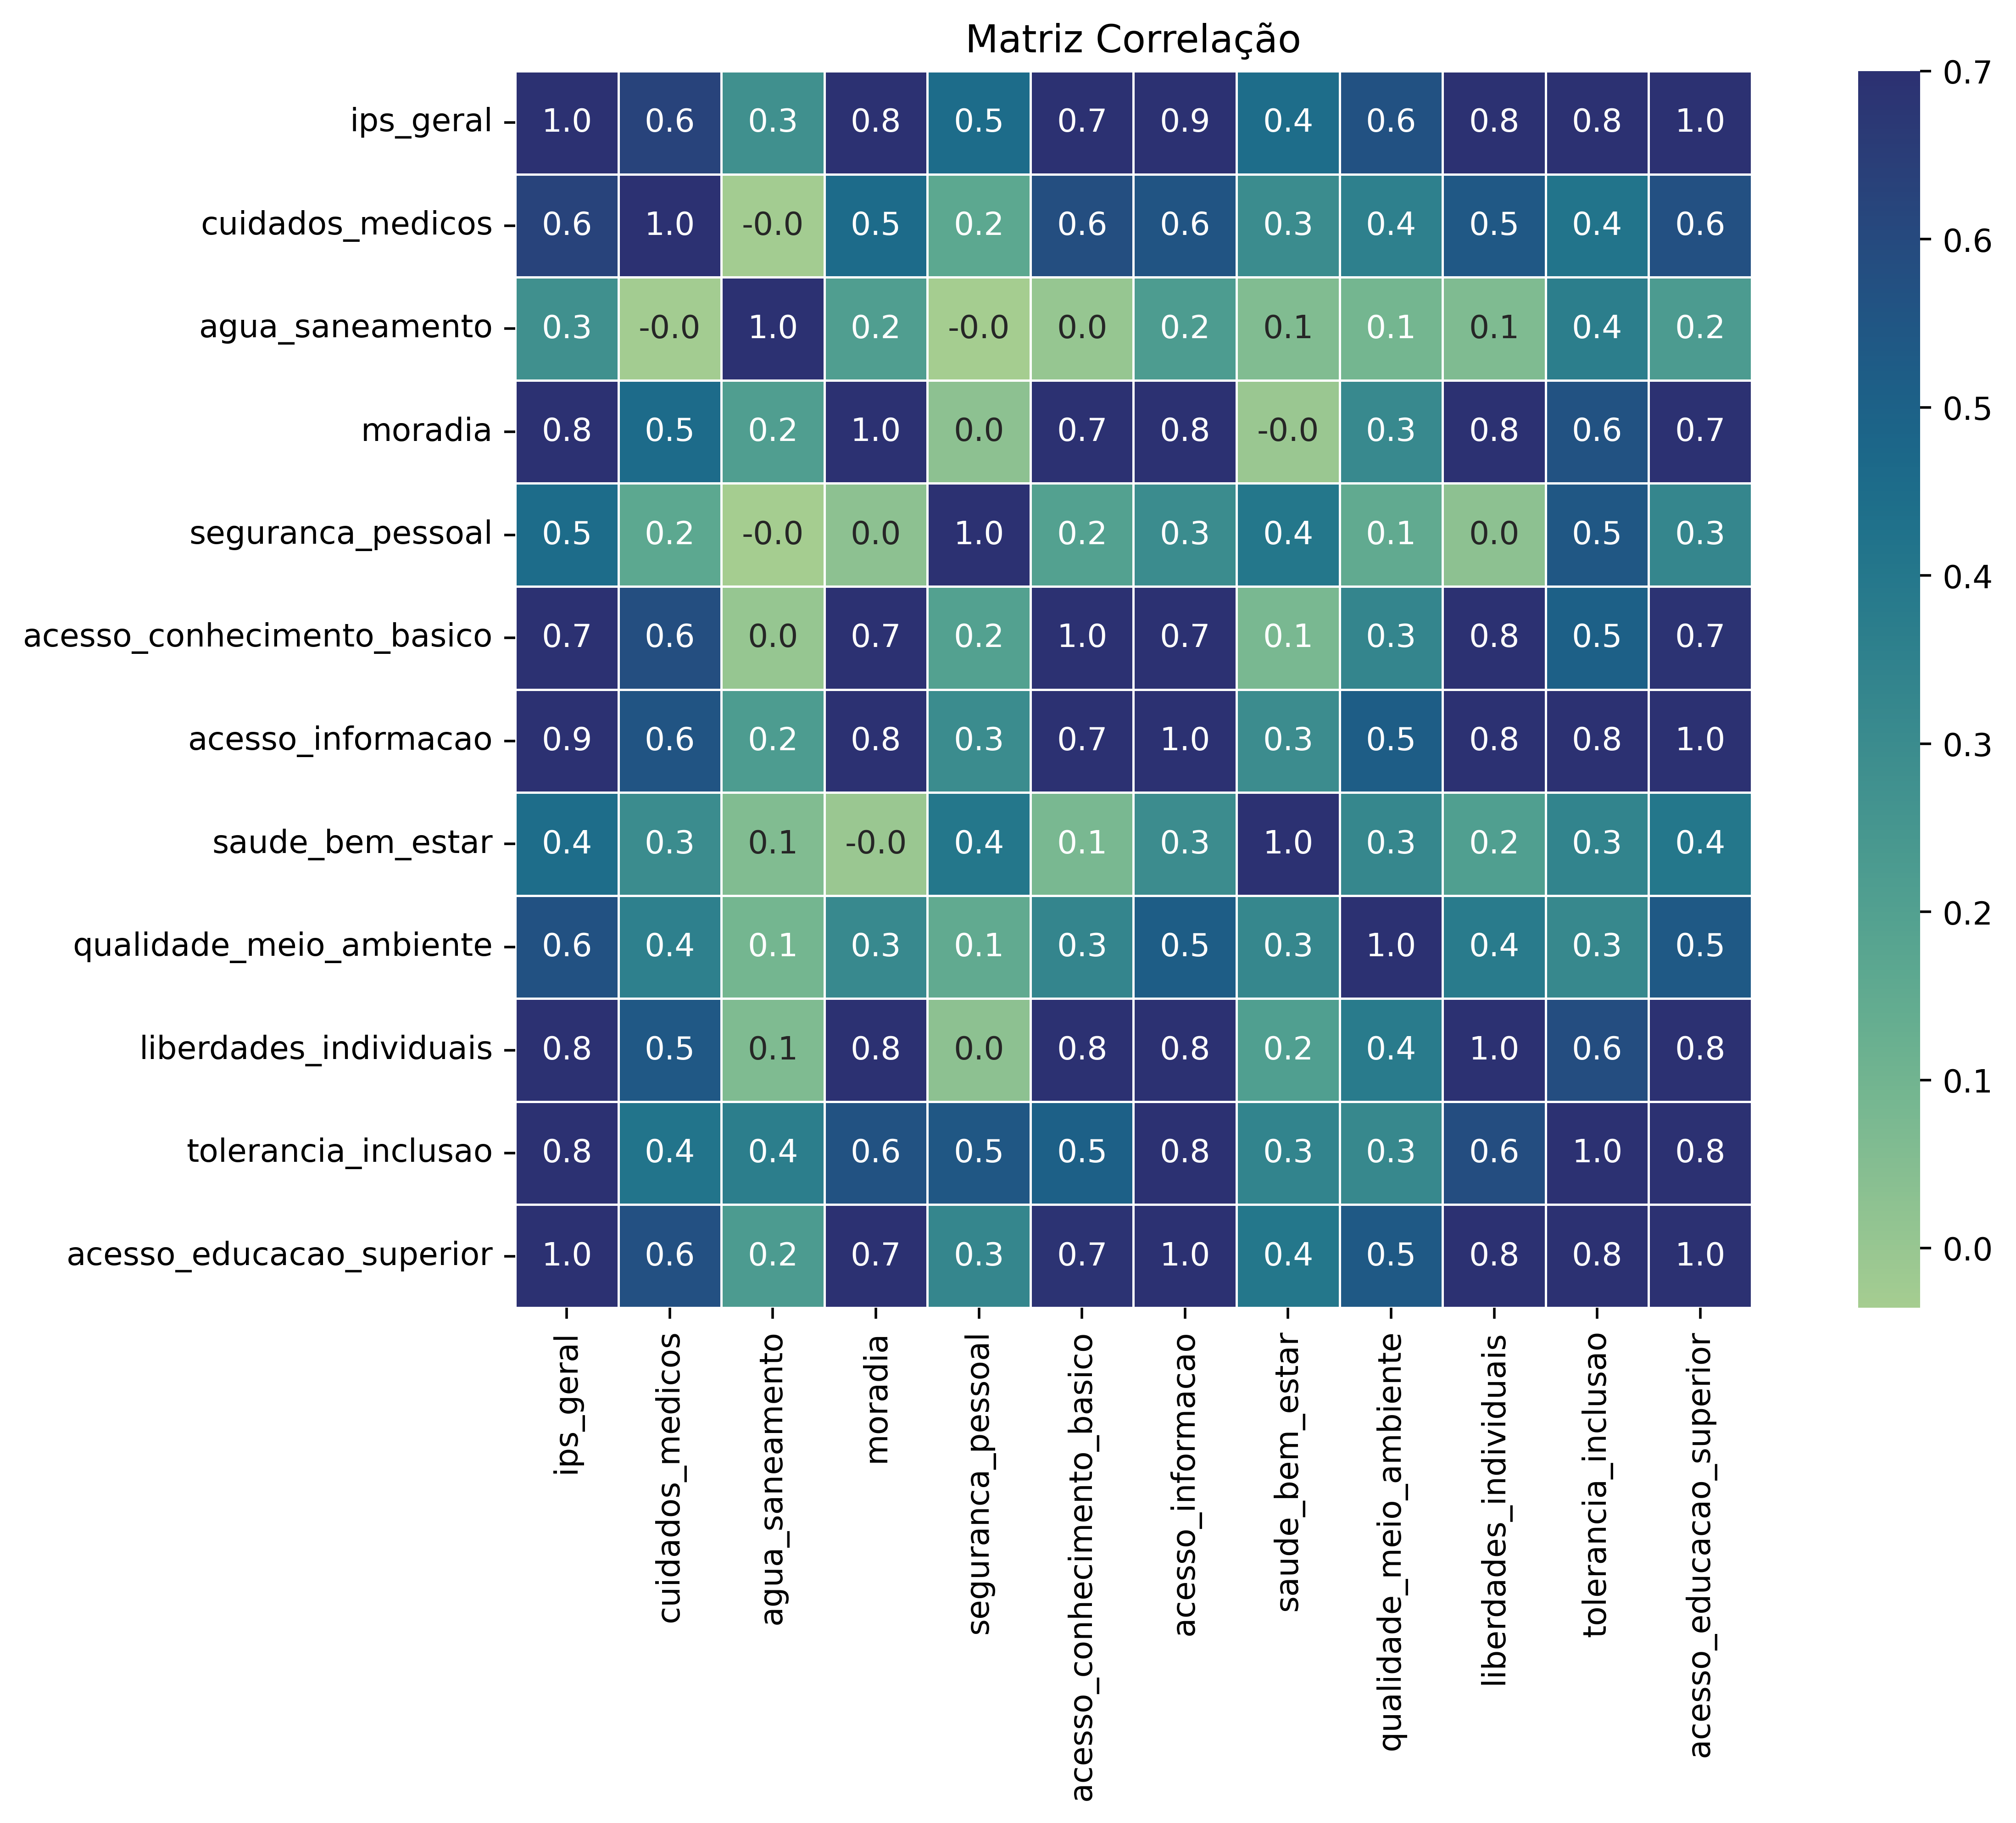

In [7]:
df_rj_correlacao = df_rj.drop(columns=['ano', 'macro_regiao', 'regiao_administrativa', 'direitos_individuais']) #Coluna ano e direitos_individuais não apresentaram correlação relevante. Região administrativa é string, portanto não é possível correlacionar a princípio.

matriz_correlacao = df_rj_correlacao.corr()

plt.figure(figsize=(12, 7), dpi=500)
sns.heatmap(matriz_correlacao, linewidth =.5 , annot = True, vmax=.7, fmt=".1f", cmap="crest", square=True);

plt.title('Matriz Correlação')

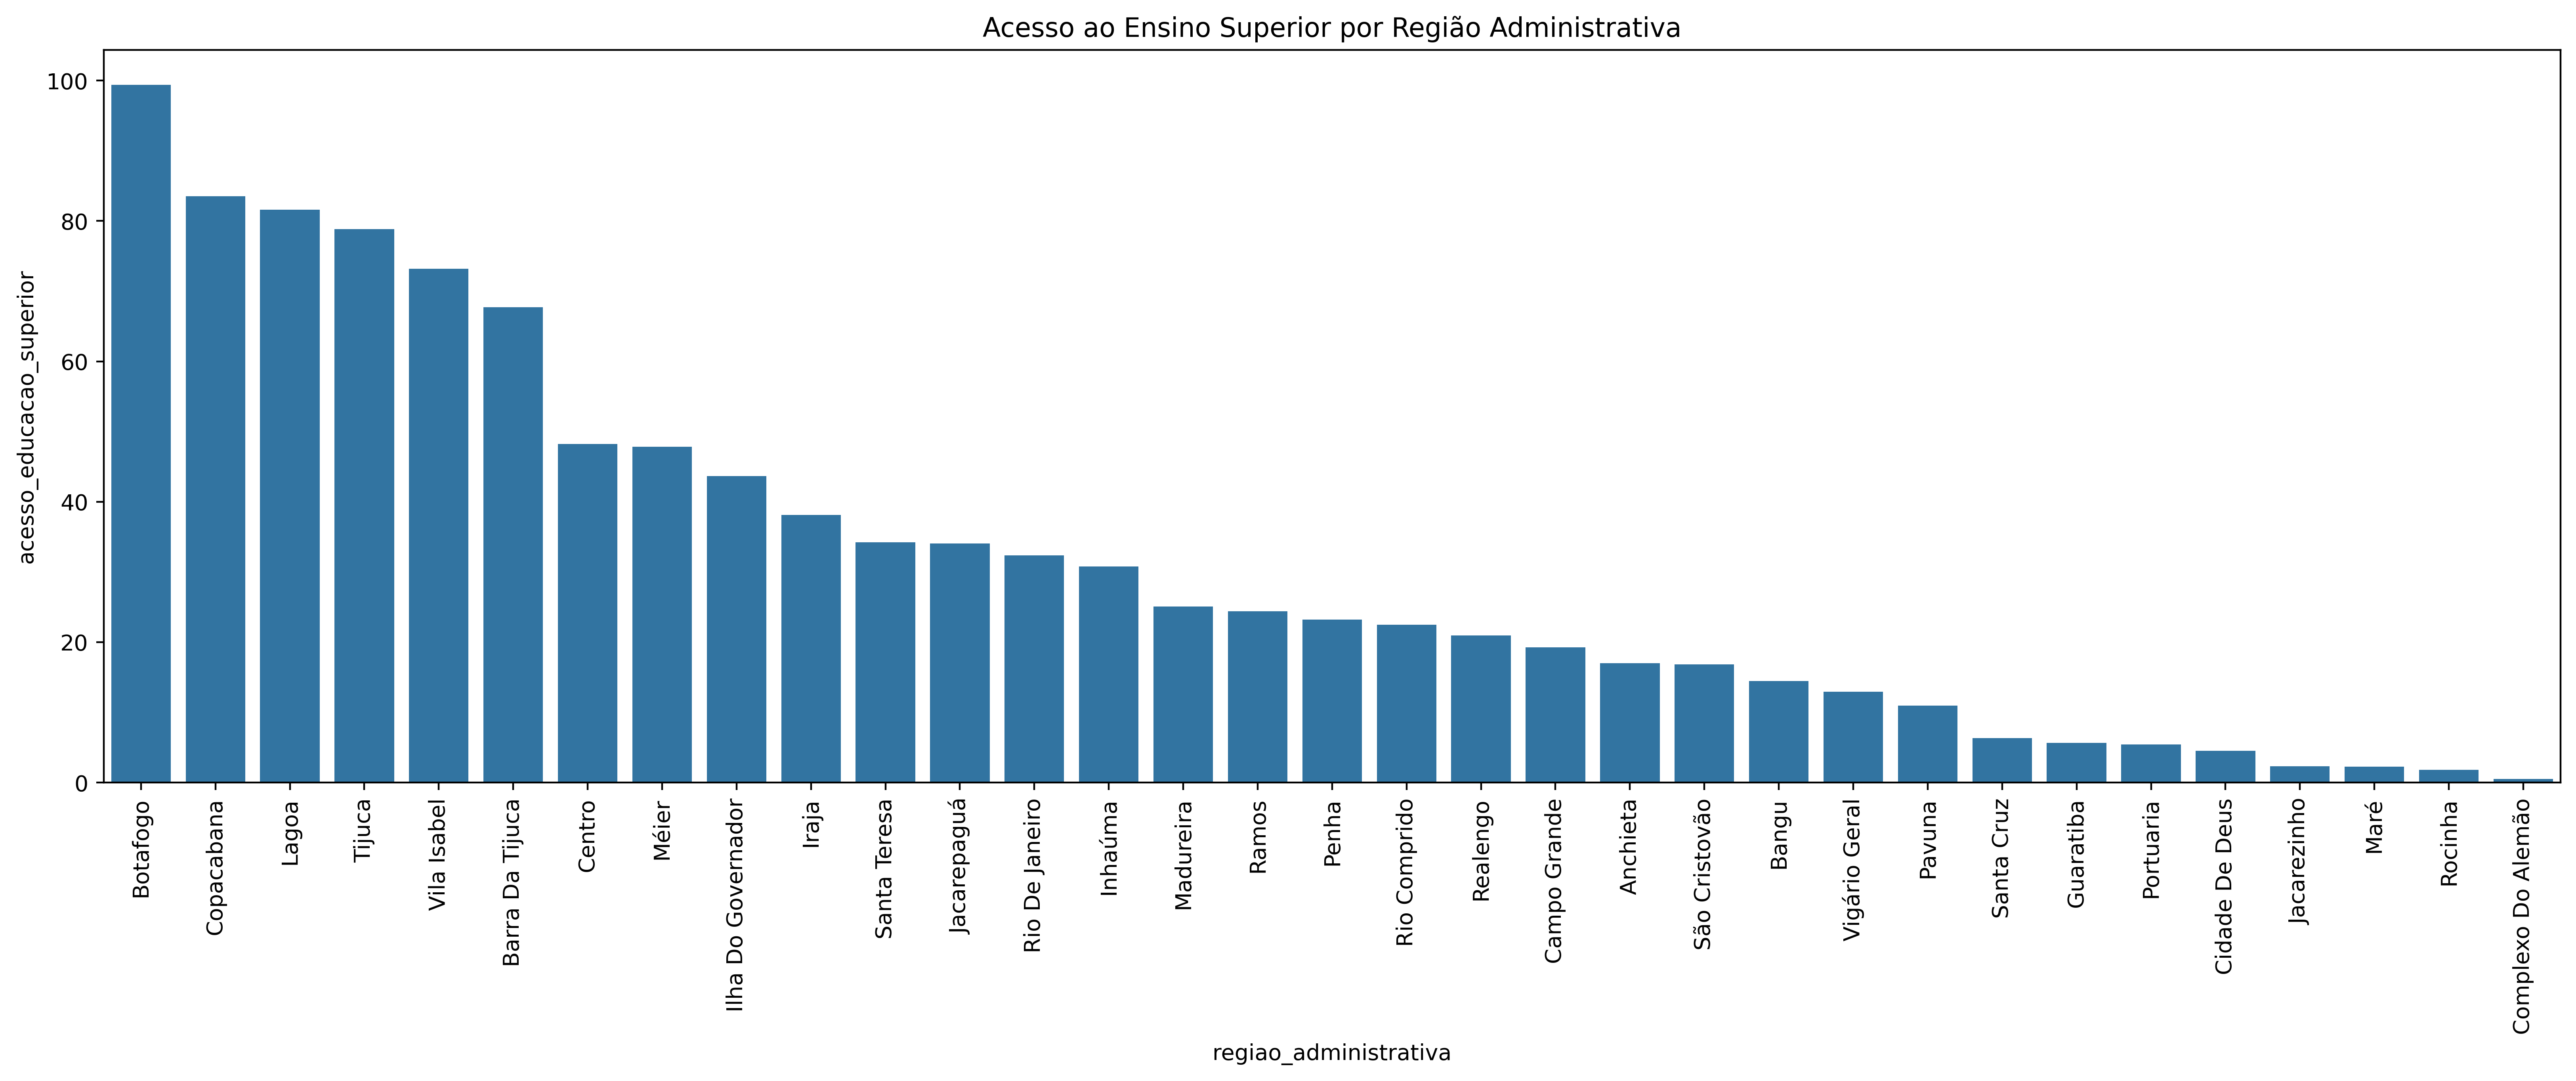

In [8]:
df_rj_decrescente = df_rj.sort_values(by='acesso_educacao_superior', ascending= False)

plt.figure(figsize=(20,6), dpi=400)
plt.xticks(rotation=90)
sns.barplot(x='regiao_administrativa', y='acesso_educacao_superior', data=df_rj_decrescente)
plt.title('Acesso ao Ensino Superior por Região Administrativa')
plt.show()


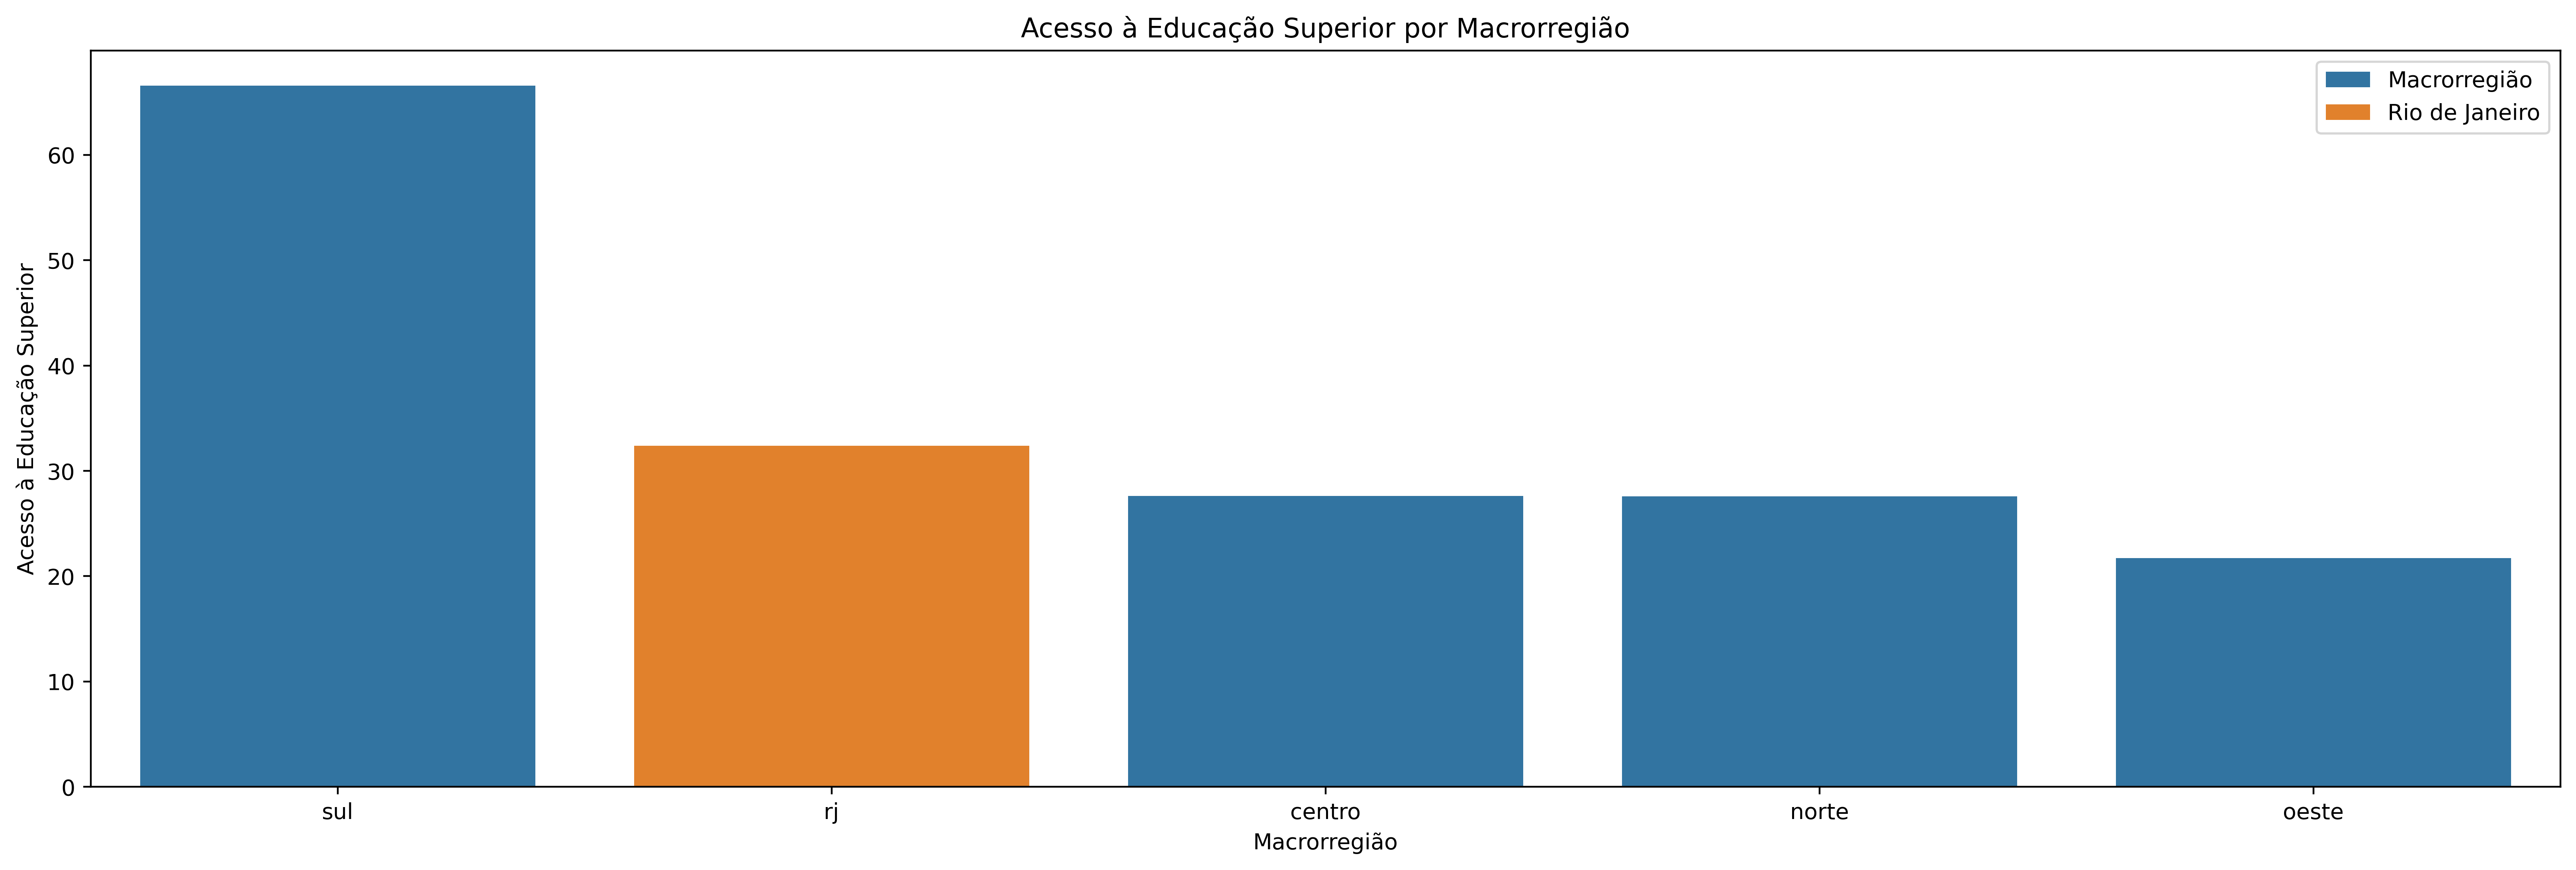

In [9]:
df_rj_agrupado = df_rj.groupby('macro_regiao', as_index=False)['acesso_educacao_superior'].mean()

df_rj_agrupado['tipo'] = df_rj_agrupado['macro_regiao'].apply(lambda x: 'Rio de Janeiro' if x == 'rj' else 'Macrorregião')

df_rj_agrupado = df_rj_agrupado.sort_values(by='acesso_educacao_superior', ascending=False)

plt.figure(figsize=(20, 6), dpi=400)

sns.barplot(x='macro_regiao', y='acesso_educacao_superior', hue='tipo', data=df_rj_agrupado)

plt.title('Acesso à Educação Superior por Macrorregião')
plt.ylabel('Acesso à Educação Superior')
plt.xlabel('Macrorregião')
plt.legend()
plt.show()


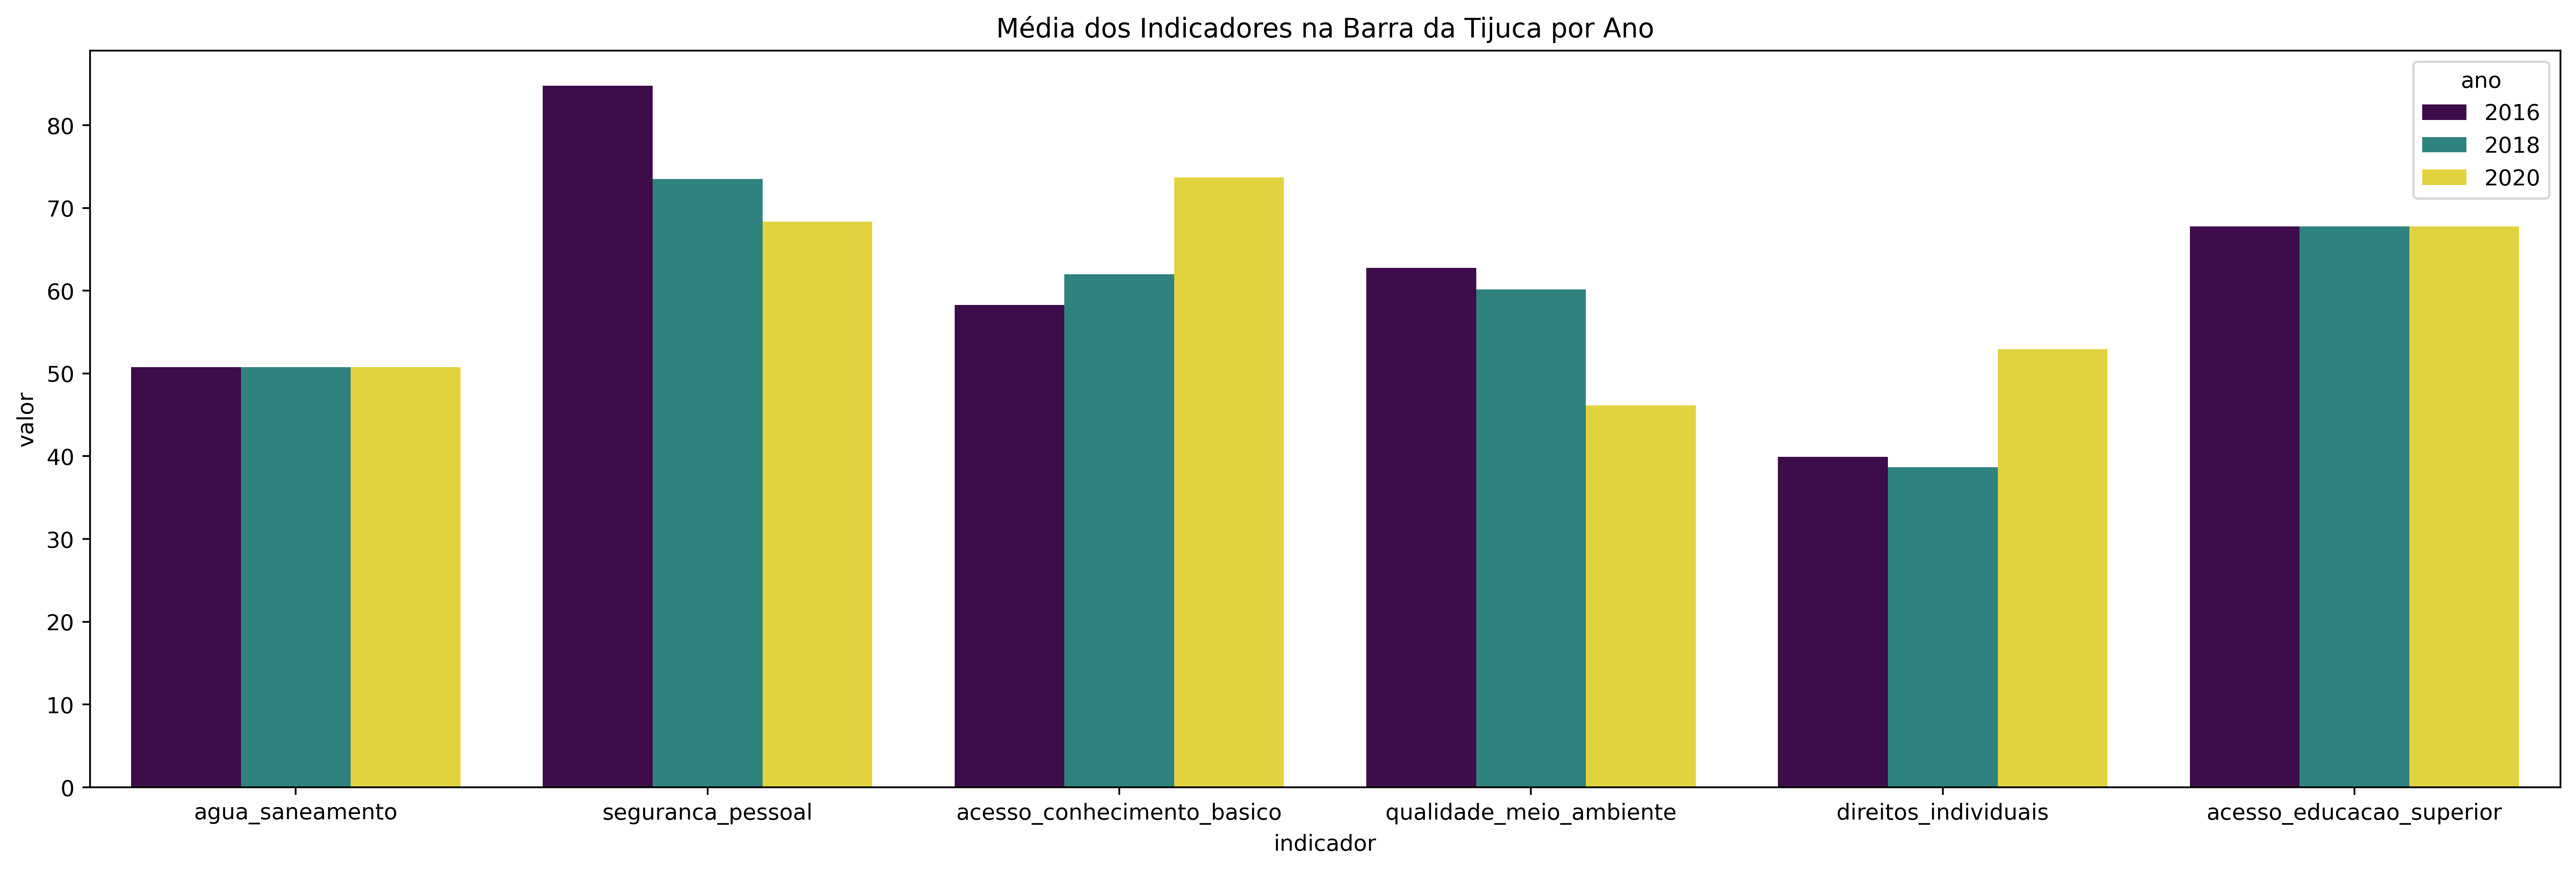

In [10]:
df_barra = df_rj[df_rj['regiao_administrativa'] == 'Barra Da Tijuca'][['ano', 'agua_saneamento', 'seguranca_pessoal', 'acesso_conhecimento_basico', 'qualidade_meio_ambiente', 'direitos_individuais', 'acesso_educacao_superior']]

df_barra_melt = df_barra.melt(id_vars='ano', var_name='indicador', value_name='valor')

plt.figure(figsize=(20, 6), dpi=400)

sns.barplot(data=df_barra_melt, x='indicador', y='valor', hue='ano', palette='viridis')
plt.title('Média dos Indicadores na Barra da Tijuca por Ano')
plt.show()


In [11]:
def regressao_linear(eixo_x, eixo_y, largura, altura):
    
    plt.figure(figsize=(largura, altura), dpi=400)
    sns.regplot(x = eixo_x, y = eixo_y);

    a, b = np.polyfit(eixo_x, eixo_y, 1)
    
    print(f'Coeficiente Angular: {a:.2f}')
    print(f'Coeficiente Linear: {b:.2f}')

Coeficiente Angular: 0.25
Coeficiente Linear: 54.12


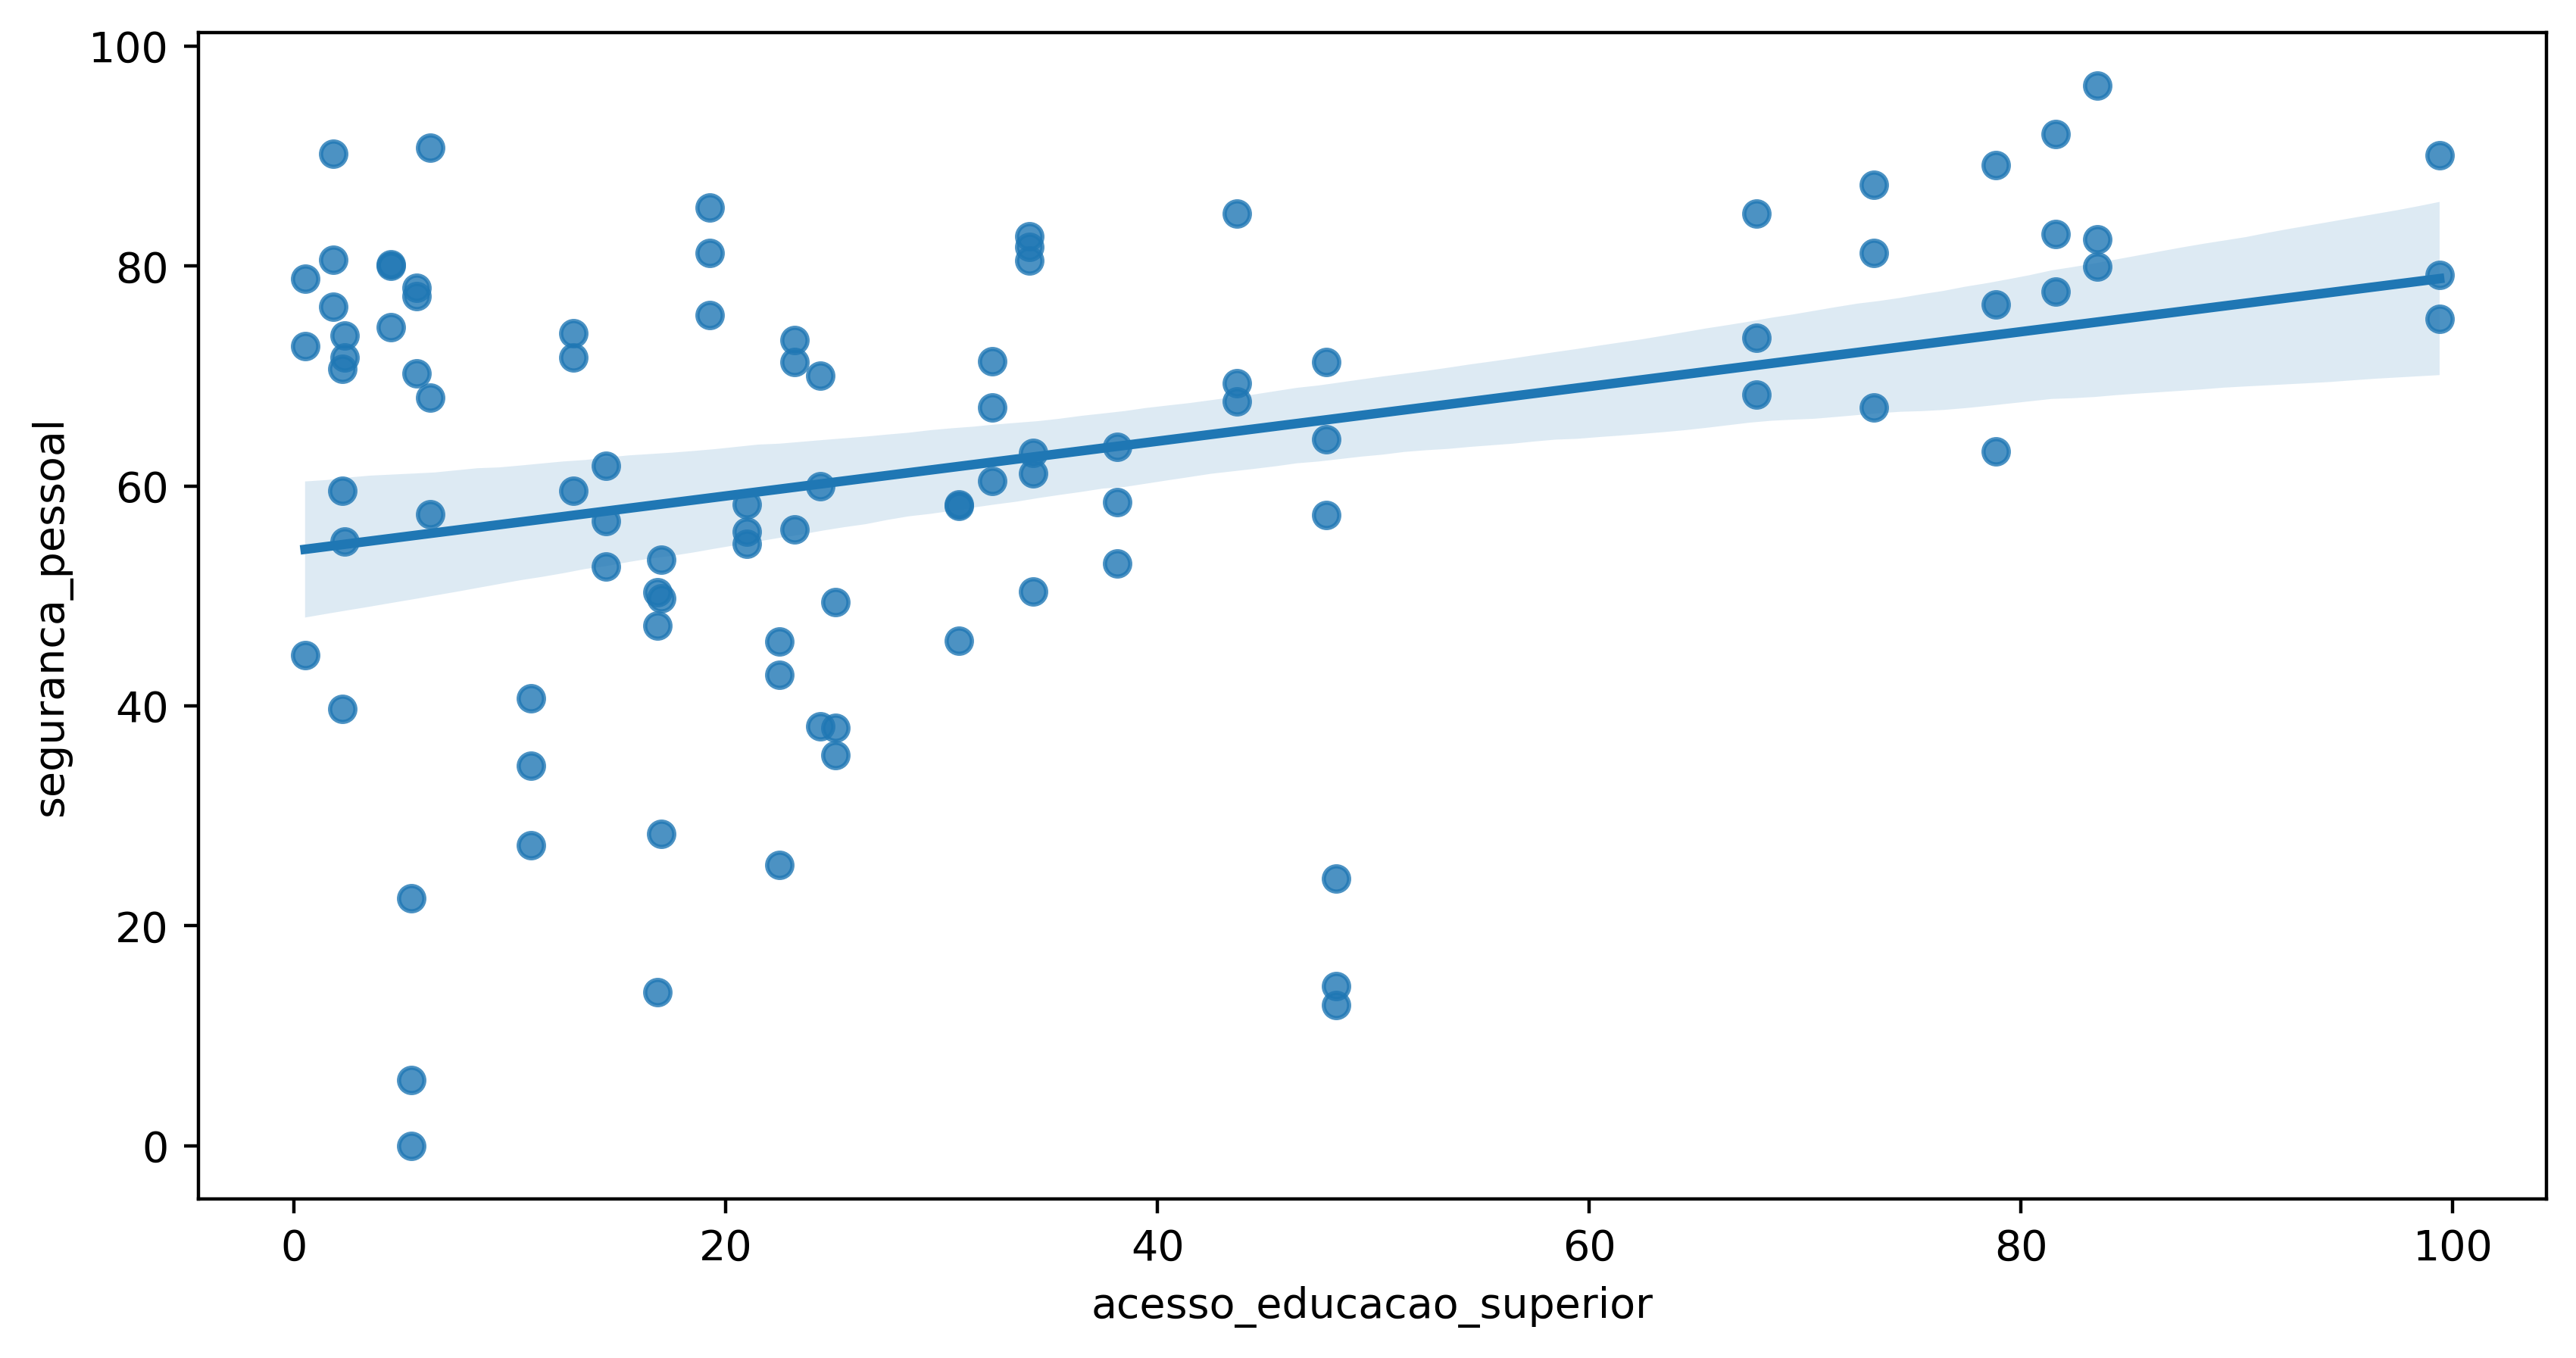

In [12]:
x = df_rj['acesso_educacao_superior']
y = df_rj['seguranca_pessoal']

regressao_linear(x, y, 10, 5)

plt.show()

In [13]:
df_teste = df_rj[(df_rj['seguranca_pessoal']>80) & (df_rj['acesso_educacao_superior']<20)][['ano', 'regiao_administrativa']]
df_teste

,ano,regiao_administrativa
63,2016,Campo Grande
65,2020,Campo Grande
67,2018,Cidade De Deus
68,2020,Cidade De Deus
77,2020,Santa Cruz
96,2016,Rocinha
98,2020,Rocinha


In [14]:
df_teste = df_rj[(df_rj['seguranca_pessoal']<20) & (df_rj['acesso_educacao_superior']>40)][['ano', 'regiao_administrativa']]
df_teste

,ano,regiao_administrativa
1,2018,Centro
2,2020,Centro


In [15]:
df_rj[df_rj['regiao_administrativa'] == 'Botafogo']

,ano,regiao_administrativa,macro_regiao,ips_geral,cuidados_medicos,agua_saneamento,moradia,seguranca_pessoal,acesso_conhecimento_basico,acesso_informacao,saude_bem_estar,qualidade_meio_ambiente,direitos_individuais,liberdades_individuais,tolerancia_inclusao,acesso_educacao_superior
87,2016,Botafogo,sul,87.12,85.15,98.49,99.55,90.08,78.47,86.52,81.46,78.07,68.19,85.74,94.30,99.39
88,2018,Botafogo,sul,87.09,91.53,98.49,99.56,75.17,75.65,86.52,84.96,77.10,73.15,87.04,96.54,99.39
89,2020,Botafogo,sul,85.03,89.92,98.49,99.07,79.18,80.70,86.52,78.58,62.56,56.63,89.80,99.48,99.39


Coeficiente Angular: 0.50
Coeficiente Linear: 59.15


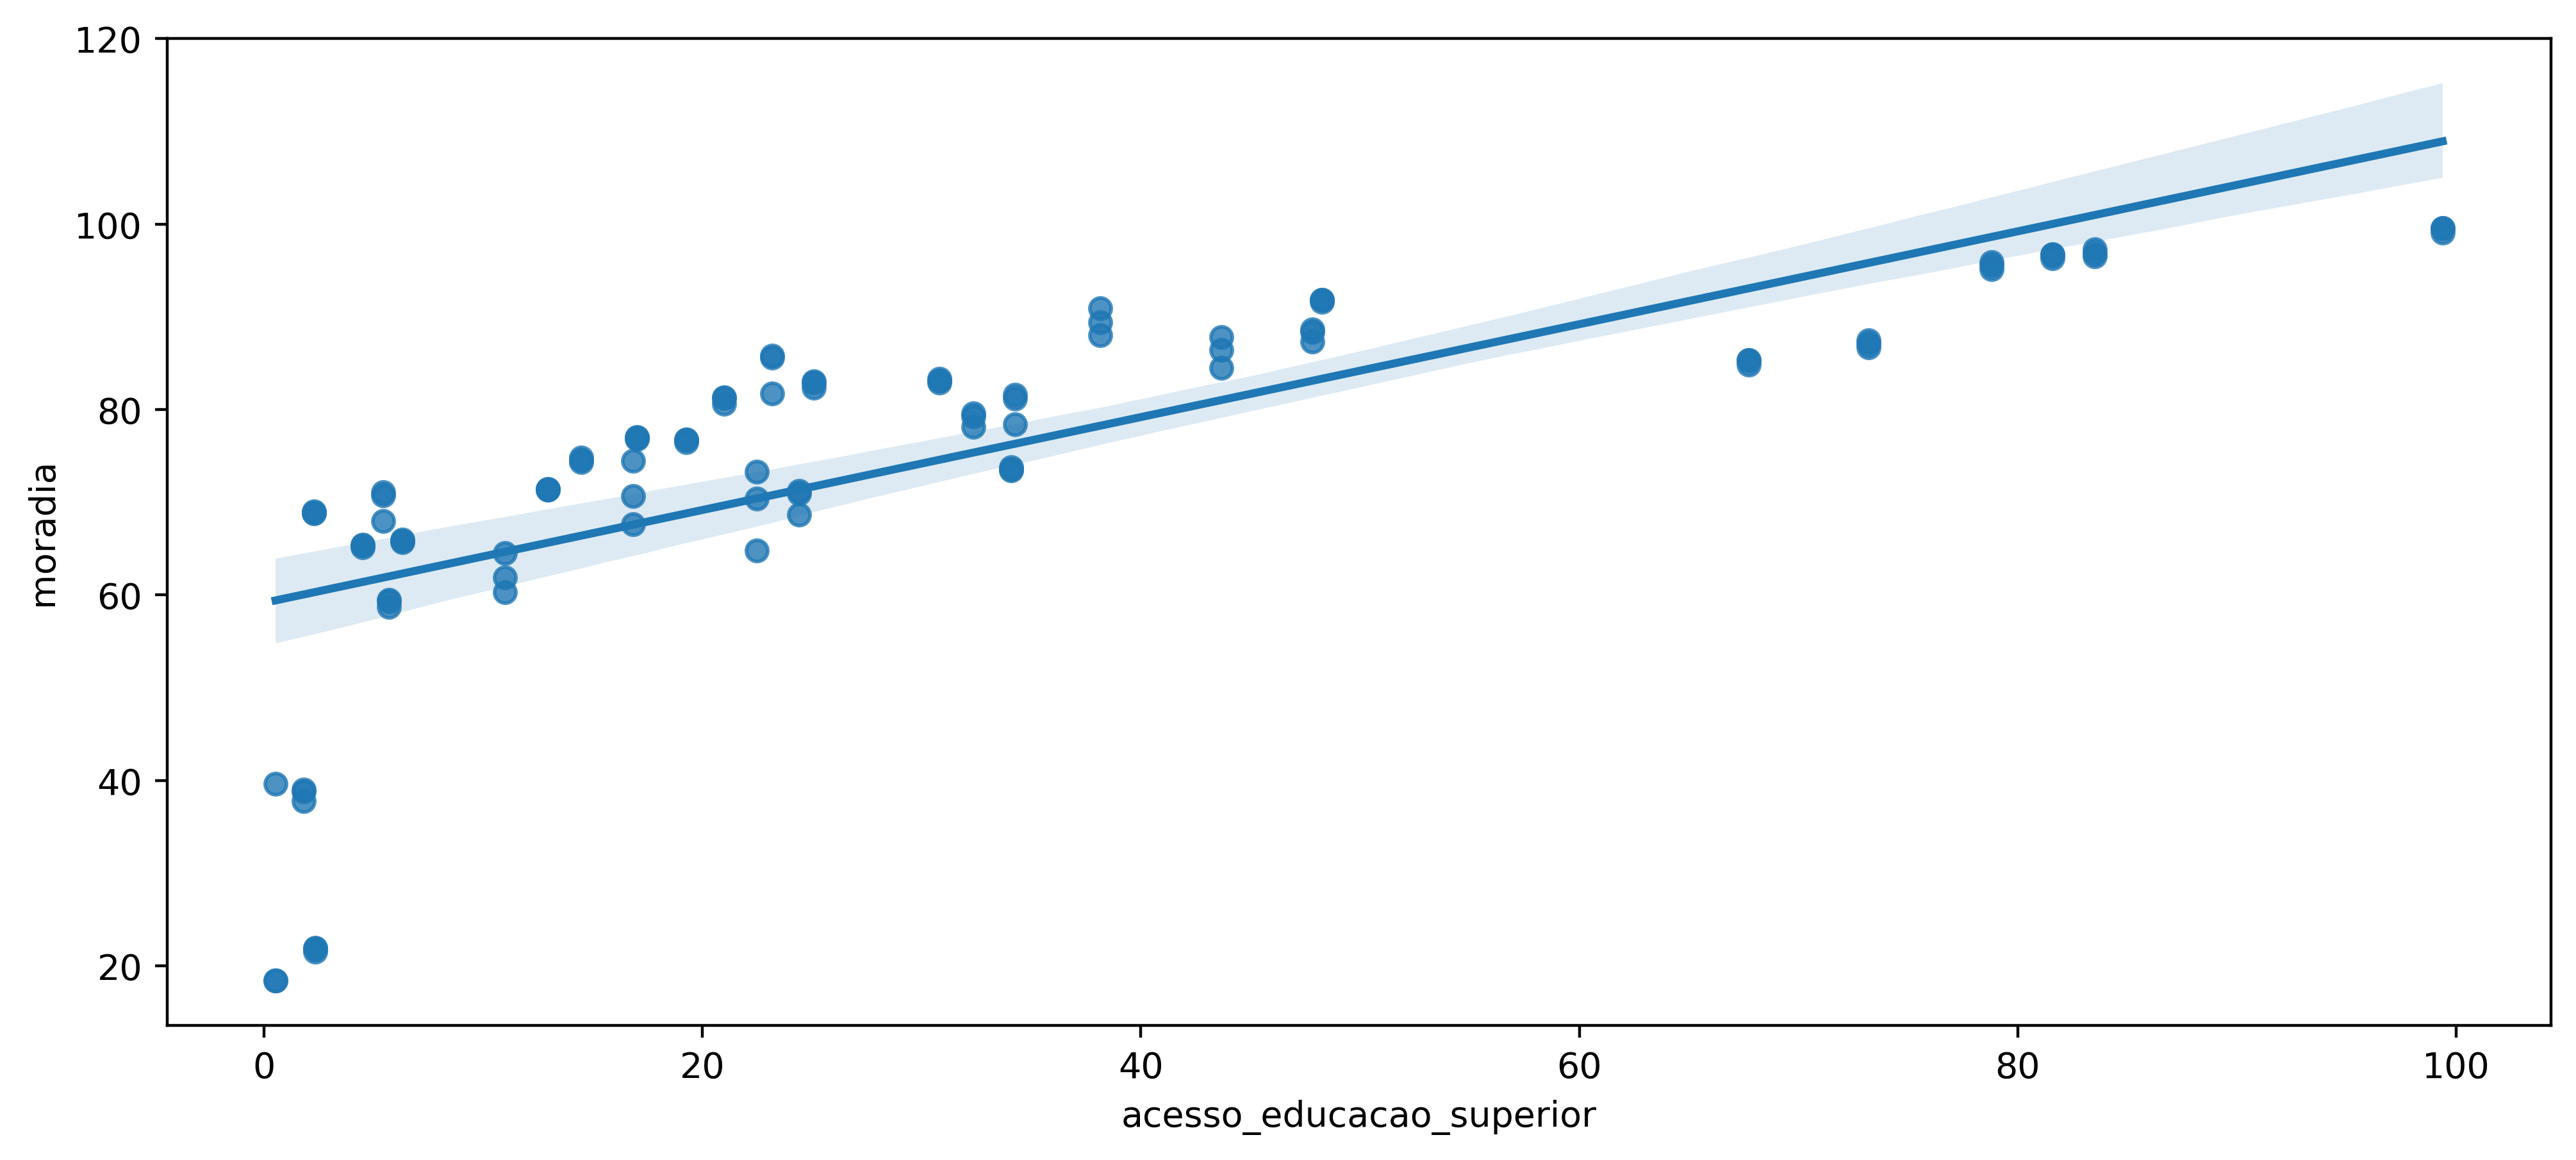

In [17]:
x = df_rj['acesso_educacao_superior']
y = df_rj['moradia']

regressao_linear(x, y, 12, 5)